# 
## Analizing the time periods of registration process for new courses from University 

The Universidad católica de Chile offers a series of paid courses that constitute an important source of income for the institution. The moment a person submits an aplication for any of these courses, their data gets logged into a database which allows them to start the registration process.
This process has several steps to follow, but at the end, some people succeed in obtaining a course they wanted and sometimes they drop the process completely. The University is interested in implementing a better management strategy that will help them retain more students. Because of this, we have been asked to analize the time periods of the registration process to obtain some insights that might help the university employees understand how to manage the registration process. 



## Objectives
For this project we are interested in understanding the periods of time each student takes between the first registration step (submitting an application) until the end of the process (when they drop or pay for the course)

- How long do people normally take before paying for a course they are interested in?
- How long do people normally take before dropping a course they were interested in?
- Which factors may be relevant to understand this process?

We will work on a spreadsheet from Pontificia Universidad Católica de Chile that has information about the registration process to the courses offered by their faculty of laws. 
Since every faculty operates with the same spreadsheet template, this project can then be applied to the dataset of any faculty.

## Conclusions



# Exploring the dataset

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the file "oportunidades.csv". 

oportunities = pd.read_csv('oportunidades.csv') # Oportunities for obtaining new students registered for the university courses

In [3]:
print(oportunities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unidad que dicta el programa                 2949 non-null   object 
 1   Sección: Nombre del sección                  2949 non-null   object 
 2   Sección: Tipo de Actividad                   2949 non-null   object 
 3   Código Sence                                 3 non-null      float64
 4   Fecha de inicio sección                      2949 non-null   object 
 5   Sección: Fecha de Término                    2949 non-null   object 
 6   Actividad abierta / cerrada                  2949 non-null   object 
 7   Nombre de la oportunidad                     2949 non-null   object 
 8   Fecha de creación                            2949 non-null   object 
 9   mes                                          2823 non-null   object 
 10  

# Identify columns of interest 

To obtain a time period of the registrationprocess we need these columns:
- 'Fecha de creación' (Start of the process)
- 'Fecha de cierre'  (End of the process)


The columns that we can use to analyze the factors that may influence the time period of the registration process are the following:

- 'Sección: Nombre del sección' (Name of the Section that includes the course)
- 'Nombre de la oportunidad' (Name of the course)
- 'Sección: Tipo de Actividad' (Kind of course)
- 'Propietario de oportunidad: Nombre completo' (Employee in charge of registration process)
- 'Tipo de registro de la oportunidad' (Kind of inscription process)
- 'Alumno: Región' (Region of residence)
- 'Alumno: Trabajas actualmente' (Current workplace)


faculty = oportunities['Unidad que dicta el programa'] (Corresponding faculty)
section = oportunities['Sección: Nombre del sección'] (Name of the Section that includes the course)

course = oportunities['Nombre de la oportunidad'] # Name of the course
kind_course = oportunities['Sección: Tipo de Actividad'] # Kind of course
employee = oportunities['Propietario de oportunidad: Nombre completo'] # Employee in charge of registration process
kind_reg = oportunities['Tipo de registro de la oportunidad'] # Kind of inscription process

region = oportunities['Alumno: Región']
work_status = oportunities['Alumno: Trabajas actualmente']


## Cleaning dataset



In [4]:
# State of registration process
state_reg = oportunities['Etapa'] 
print(state_reg.value_counts())
print(len(oportunities))

Cerrada Perdida                   1477
Cerrada Ganada                    1222
Completando Ficha                  108
Aceptado | Verificar descuento     104
Pendiente de Pago                   14
Matricula OK                        12
Revisión de Antecedentes            11
Verificación de Descuentos           1
Name: Etapa, dtype: int64
2949


We have 2949 entries (rows) on the dataset. 
These entries show data about people interested in the courses provided by the university, but not all of them have gone through the whole process. For the sake of our objectives we will only consider those that have already  finished or closed the process. 

In [5]:
# Drop rows of active registration processes
oportunities = oportunities[oportunities['Etapa'].isin(['Cerrada Perdida', 'Cerrada Ganada']) == True] # Keep only finished or closed processes
print(len(oportunities))


2699


In [6]:
print(oportunities['Nombre de la oportunidad'].value_counts())

Nicolas Arriagada Ramirez - Diplomado de Especialización en juicios orales y técnicas de litigación - 2023-04-03        4
Diego Vergara Manchego - Diplomado en Derecho penal económico - 2023-04-11                                              4
Enrique Gillmore Carmona - Humedales urbanos: regulación, tendencias y aspectos prácticos - 2023-01-04                  3
Luis Eduardo Stollsteimer Godoy - Diplomado en Medio ambiente y desarrollo sustentable - 2023-05-29                     3
Felipe Torres Arrau - Diplomado de Especialización en juicios orales y técnicas de litigación - 2023-01-06              3
                                                                                                                       ..
Felipe Concha Tellez - Diplomado en Criminología - 2023-05-22                                                           1
Felipe Diaza Arancibia - Diplomado en Medio ambiente y desarrollo sustentable - 2023-05-29                              1
Felipe Duhalde Vera - Di

## Periods of registration process


In [7]:
# Identify the date columns of start and end of the registration process
start_reg = oportunities['Fecha de creación'] 
end_reg = oportunities['Fecha de cierre'] 

# Read columns as datetime object
start_reg = pd.to_datetime(start_reg, dayfirst=True)
end_reg = pd.to_datetime(end_reg, dayfirst=True)

# Obtain time period from start and end date of registration
oportunities['registration_period'] = end_reg - start_reg
reg_period  = oportunities['registration_period'] 

print(reg_period.head(5))


0   150 days
1    25 days
2     5 days
3     9 days
4    20 days
Name: registration_period, dtype: timedelta64[ns]


In [8]:
# Transform timedelta to float in new column
oportunities['time_p'] = reg_period/np.timedelta64(1, 'D')
print(oportunities['time_p'].head(5))# New column for 

0    150.0
1     25.0
2      5.0
3      9.0
4     20.0
Name: time_p, dtype: float64


From the 

## Exploratory Visualization for time period of the registration process

The data we are using correspond to closed registration aplications. Of those registrations, we have:
- Succes cases: Oportunities that have been won or acquired 
- Failed cases: Oportunities that have been lost or dropped

In [9]:
# Average timep period of closed registration process 

failed_c = oportunities[oportunities['Etapa'] == 'Cerrada Perdida'] #Failed cases
success_c = oportunities[oportunities['Etapa'] == 'Cerrada Ganada'] # Success cases

print('Average time period of registration process for success cases')
print(success_c['time_p'].mean().round())

print('Average time period of registration process for droped cases')
print(failed_c['time_p'].mean().round())

Average time period of registration process for success cases
16.0
Average time period of registration process for droped cases
37.0


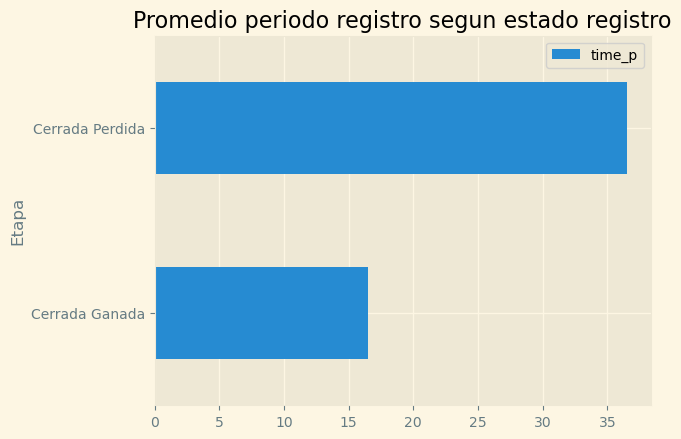

In [10]:
plt.style.use('Solarize_Light2') # Standard plot style

# Aggregation method to obtain mean time periods based on the state of registry
state = pd.pivot_table(data=oportunities, values='time_p', index='Etapa')
state.plot.barh()
plt.title('Promedio periodo registro segun estado registro')
plt.show()

There is a significant difference in the average time period between success and failed cases. We can see that people will drop the registration process after 37 days on average, while others will  take 16 days on average to complete the process successfully.
We could say that people who want the course will normally take about two weeks to conclude the registration process and those who do not want the course will take around one month to drop the course. 


### Exploratory Visualization of registration process from success cases  

For this project, we want to focus primarily on the processes that were completed successfully. We want to see what factors may be related to the time periods of the registration process for success cases.

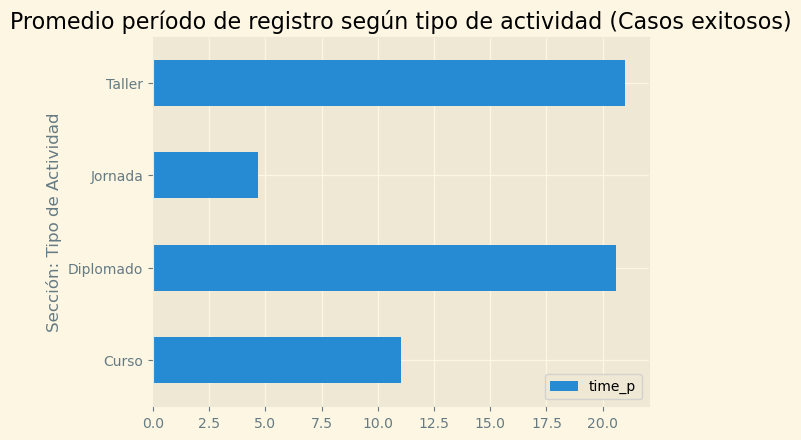

                               time_p
Sección: Tipo de Actividad           
Curso                       11.021605
Diplomado                   20.602941
Jornada                      4.682927
Taller                      21.000000


In [11]:
# Analyzing registrtion time period based on kind of activity
t_activity = pd.pivot_table(data=success_c, values='time_p', index='Sección: Tipo de Actividad')
t_activity.plot.barh()

plt.title('Promedio período de registro según tipo de actividad (Casos exitosos)')
plt.show()

print(t_activity)

There is significant differences in the time periods form different kinds of activities. People take less time deciding to complete the registration process for 'Jornadas' (around 5 days) and 'Cursos' (around 11 days), while 'Diplomados' (around 20 days) and 'Taller' (around 21 days) take a lot more time. 

Maybe the time period is related to cost of each course.

(82,)

Cantidad de secciones
(82,)


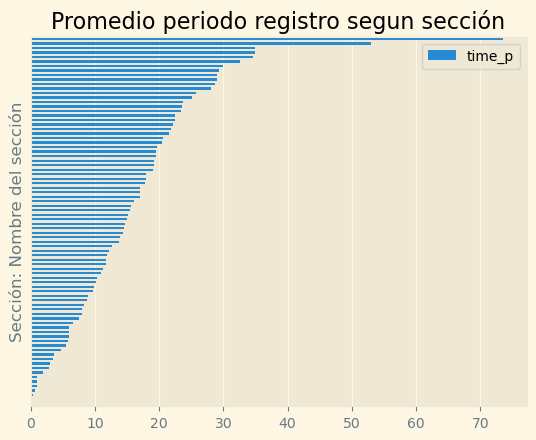

In [29]:
# How many sections are there
sections = success_c['Sección: Nombre del sección'].value_counts()
print('Cantidad de secciones')
print(sections.shape)



sections
# Aggregation method to obtain mean time periods based on sections of courses
sections_t = pd.pivot_table(data=success_c, values='time_p', index='Sección: Nombre del sección')
sections_t.sort_values(by='time_p').plot.barh()
plt.title('Promedio periodo registro segun sección')
plt.yticks([]) # Too many section names for the graph. 


plt.show()



There are mayor differences in time periods of registration between each course. This calls for further investigation to see if there are more popular topics on each course that may influence the decision making process based on availability of slots, name of professor, etc...)

### Pricing and time period correlation

0.18195793985356884


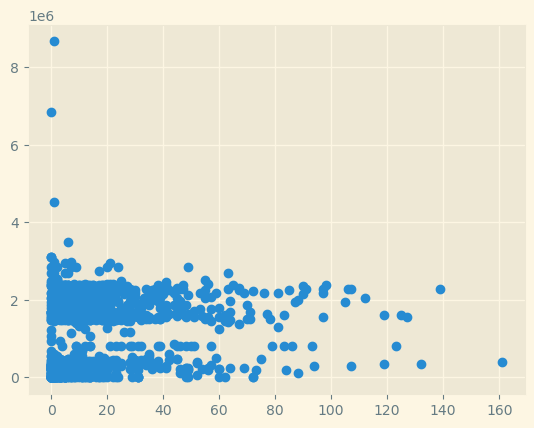

In [12]:
valor = success_c['Valor Total a Pagar'].str.split().str.get(1).str.replace(',', '') # Extract currency strings
valor = valor.astype(float) 
print(success_c['time_p'].corr(valor)) # Obtain correlation value

plt.scatter(success_c['time_p'], valor)
plt.show()



We can see that there is no clear relation between the time period and the cost of the courses. 

### Time period and gender

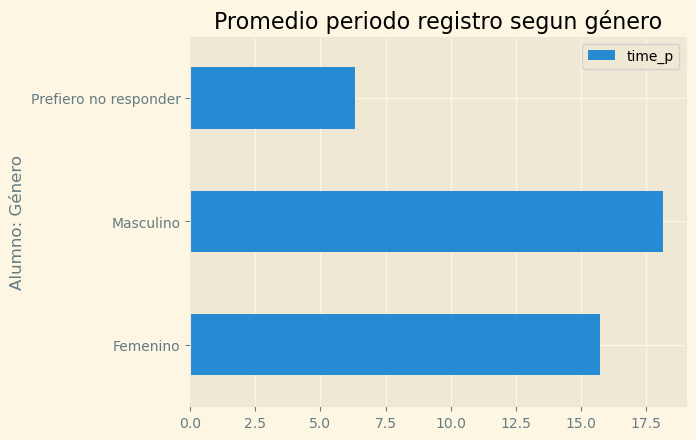

In [13]:

# Aggregation method to obtain mean time periods based on gender
gender_t = pd.pivot_table(data=success_c, values='time_p', index='Alumno: Género')
gender_t.plot.barh()
plt.title('Promedio periodo registro segun género')
plt.show()

We can see there is a minor difference between male and female time periods. On average, men normally take a few days longer tah women to pay for their courses. 

### Time period and employee in charge of process

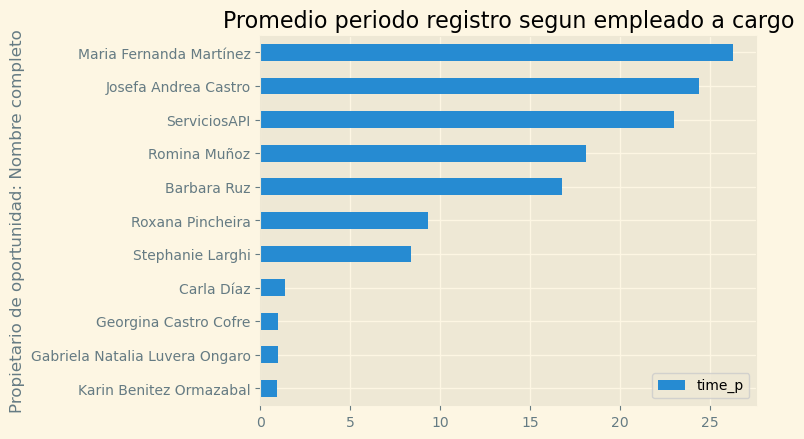

Cantidad de oportunidades de cada propietario
Romina Muñoz                      694
Barbara Ruz                       400
Karin Benitez Ormazabal            42
Georgina Castro Cofre              36
Maria Fernanda Martínez            16
Josefa Andrea Castro               11
Gabriela Natalia Luvera Ongaro      9
Carla Díaz                          5
Stephanie Larghi                    5
Roxana Pincheira                    3
ServiciosAPI                        1
Name: Propietario de oportunidad: Nombre completo, dtype: int64


In [14]:

# Aggregation method to obtain mean time periods based on employee on charge
employee_t = pd.pivot_table(data=success_c, values='time_p', index='Propietario de oportunidad: Nombre completo')
employee_t.sort_values(by='time_p').plot.barh()
plt.title('Promedio periodo registro segun empleado a cargo')
plt.show()

# Compare with the number of cases each employee is responsible for
print('Cantidad de oportunidades de cada propietario')
print(success_c['Propietario de oportunidad: Nombre completo'].value_counts())


We can see that there are significant differences in the time periods of registration between employees in charge of the processess, but it is not a trustworthy analysis because of the large difference between the number of cases that each one is in charge of. 

# Comparing registration process between success and failed cases

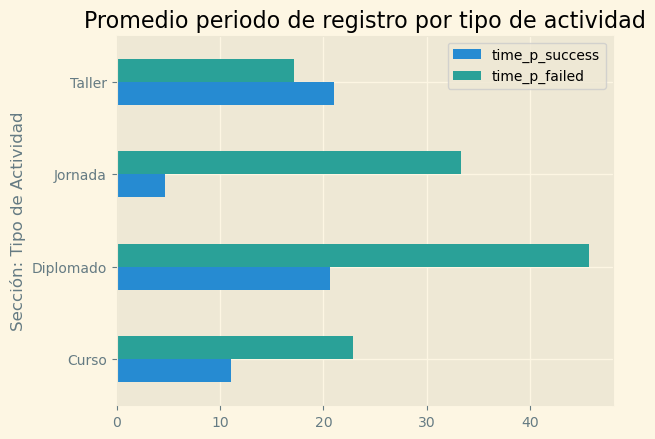

In [15]:
# Comparing success and failed registrtion time periods based on kind of activity
t_activity = t_activity.rename(columns={"time_p":'time_p_success'}) #Change name of column to diferentiate

t_activity_f = pd.pivot_table(data=failed_c, values='time_p', index='Sección: Tipo de Actividad')
t_activity_f = t_activity_f.rename(columns={"time_p":'time_p_failed'})

t_activities_combined = pd.concat([t_activity, t_activity_f], axis=1)

t_activities_combined.plot.barh()
plt.title('Promedio periodo de registro por tipo de actividad')
plt.show()

The kind of course seems to be the most significant factor that may influence the time period of registration process for new students. Because of this, we decided to compare both successful and failed courses. 
There is significant differences between the time periods of  different kinds of activities and at the same time a lot of difference between dropped or succesful cases. 

People usually take longer to drop a course than to succesfully take on a the course.

People take less time in dropping the registration process for 'Taller' (around 5 days) and 'Cursos' (around 11 days), while 'Diplomados' (around 20 days) and 'Taller' (around 21 days) take a lot more time. 